# Econometrics - Progresa - Mexico

## Introduction to the Progresa program - Mexico

For this analysis, I have used data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this dataset analysis is to implement some of the basic econometric techniques to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
The data is present in progresa_sample.csv data. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

##Descriptive analysis

### 	Summary Statistics

In [181]:
import numpy as np
import pandas as pd
from scipy.stats import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [42]:
#Reading progresa csv file
progresa_df = pd.read_csv('progresa_sample.csv')

#Created new df by removing year, folnum, village columns
progresa_df_edited = progresa_df.drop(['year','folnum','village'],axis=1)

#Calculating mean and standard deviation and sorting by variable name
pd.DataFrame(pd.merge(progresa_df_edited.mean().reset_index(name='Mean'), progresa_df_edited.std().reset_index(name='Std_dev'),on=['index'])).sort_values(by ='index')

,index,Mean,Std_dev
13,age,11.366460,3.167744
7,dist_cap,147.674452,76.063134
2,dist_sec,2.418910,2.234109
5,fam_n,7.215715,2.352900
4,grc,3.963537,2.499063
14,grc97,3.705372,2.572387
12,hohage,44.436717,11.620372
8,hohedu,2.768104,2.656106
11,hohsex,0.925185,0.263095
9,hohwag,586.985312,788.133664


Above table shows the summary statistics

### Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?

In [154]:
#Filtering 
progresa_filtered = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==97)] 

#Created new df by removing year, folnum, village columns
progresa_df_edited = progresa_filtered.drop(['year','folnum','village'],axis=1)

#Calculating mean values for treatment and control set
progresa_treatment_control = pd.DataFrame(pd.merge(progresa_df_edited[progresa_df_edited.progresa == 'basal'].mean().reset_index(name='Average value (Treatment villages)'), progresa_df_edited[progresa_df_edited.progresa == '0'].mean().reset_index(name='Average value (Control villages)'),on=['index']))

#Creating empty lists to append t value, p value and statistical significancy
t_value = []
p_value = []
stats_significant = []

#Iterating over the df to calculate t, p value and statistical significancy
for i in list(progresa_treatment_control['index']):
          t_value.append(stats.ttest_ind(list(progresa_df_edited[progresa_df_edited.progresa == 'basal'][i]), list(progresa_df_edited[progresa_df_edited.progresa == '0'][i]), nan_policy='omit').statistic)
          p_value.append(stats.ttest_ind(progresa_df_edited[progresa_df_edited.progresa == 'basal'][i], progresa_df_edited[progresa_df_edited.progresa == '0'][i], nan_policy='omit').pvalue)
          if stats.ttest_ind(progresa_df_edited[progresa_df_edited.progresa == 'basal'][i], progresa_df_edited[progresa_df_edited.progresa == '0'][i], nan_policy='omit').pvalue < 0.05:
                stats_significant.append('TRUE')
          else: stats_significant.append('FALSE')
        
# Using the above ccreated list to create 3 columns as needed        
progresa_treatment_control['Difference (Treat - Control)'] = t_value   
progresa_treatment_control['p-value'] = p_value
progresa_treatment_control['Statistically_Significant'] = stats_significant      
progresa_treatment_control


,index,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value,Statistically_Significant
0,sex,0.519317,0.505052,2.506686,1.219172e-02,TRUE
1,indig,0.325986,0.332207,-1.161714,2.453603e-01,FALSE
2,dist_sec,2.453122,2.507662,-2.100433,3.569843e-02,TRUE
3,sc,0.822697,0.815186,1.668745,9.517806e-02,FALSE
4,grc,3.531599,3.543050,-0.400196,6.890151e-01,FALSE
5,fam_n,7.281327,7.302469,-0.794167,4.271039e-01,FALSE
6,min_dist,107.152915,103.237854,8.206584,2.358312e-16,TRUE
7,dist_cap,150.829074,153.769730,-3.339081,8.415005e-04,TRUE
8,hohedu,2.663139,2.590348,2.541229,1.105093e-02,TRUE
9,hohwag,544.339544,573.163558,-3.594588,3.253835e-04,TRUE


### Interpretation

A: Statistical significance is defined based on the p-value. If the p-value is less than 0.05 then we can say that 
there is significant difference between treatment and control villages as baseline. Thus observing the right most column in the above table, we can say that there is significant difference for sex, dist_sec (nearest distance to a secondary school), min_dist (min distance to an urban center), dist_cap (min distance to the capital), hohedu (years of schooling of head of household), hohwag (monthly wages of head of household),hohage (age of head of household), welfare_index (welfare index used to classify poor) variables.

B: For any comparison between treatment and control, it is required to have a same baseline so as to gauge the
actual effect of the treatment. Thus if treatment and control group are significantly different at baseline then we
cant have fully randomized sets for the experiments.

C: As there is significant differenc between some of the variables for treatment and control groups, we cannot measure
the true impact. Thus some of the othe strategies like double differences should be used to measure the impact.

### Graphical exploration

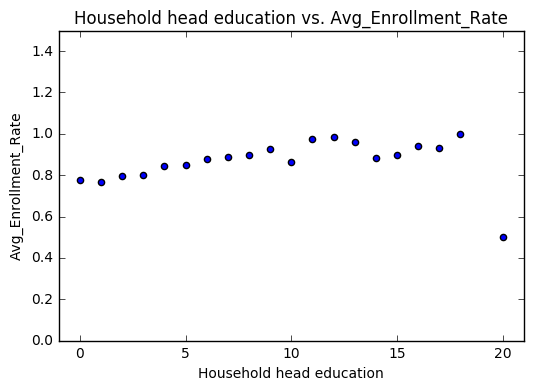

In [133]:
#Filtering for year 1997
progresa_filtered = progresa_df[(progresa_df.year==97) & (progresa_df.sc!=np.nan)] 

#Grouping by hohedu which indicates household head education
#Calculating mean of sc which indicates enrolled in school in year of survey
by_hohedu = progresa_filtered.groupby([progresa_filtered.hohedu])['sc'].mean().reset_index(name='Avg_Enrollment_Rate')

#plot the data
plt.scatter(by_hohedu.hohedu, by_hohedu.Avg_Enrollment_Rate)
plt.xlim(-1, 21)
plt.ylim(0, 1.5)
plt.ylabel('Avg_Enrollment_Rate')
plt.xlabel('Household head education')
plt.title('Household head education vs. Avg_Enrollment_Rate')
plt.show()

From the above graphic we can see that as the Household head education level increases the average enrollment rate  increases gradually. But average enrollment rate drastically decreases for the highest level of Household head education.

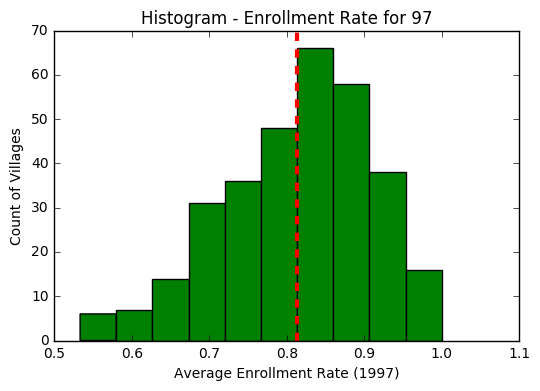

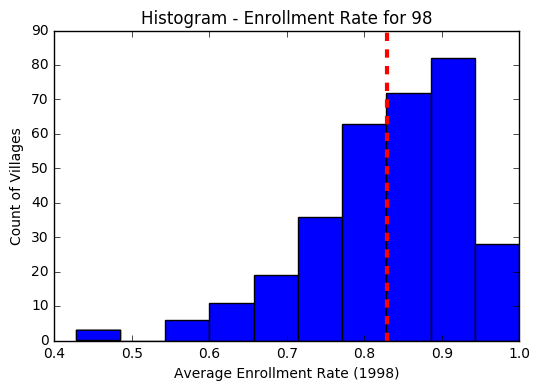

Mean of Average Enrollment Rate in 1997 0.8138394110596501
Mean of Average Enrollment Rate in 1998 0.8295362042630732


t statistic :  -2.01571348652
pvalue :  0.0442487003657


In [176]:
#Filtering data based on year, poor and treatment
#Grouping by sc to calculate mean of enrollment for each year, poor and treated group only
progresa_filtered_97 = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==97) & (progresa_df.progresa=='basal')] 
by_village_97 = progresa_filtered_97.groupby([progresa_filtered_97.village])['sc'].mean().reset_index(name='Avg_Enrollment_Rate_97')

progresa_filtered_98 = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==98) & (progresa_df.progresa=='basal')] 
by_village_98 = progresa_filtered_98.groupby([progresa_filtered_98.village])['sc'].mean().reset_index(name='Avg_Enrollment_Rate_98')

#Plotting histograms
fig = plt.figure()
ax0 = plt.hist(by_village_97['Avg_Enrollment_Rate_97'], histtype='bar', color='green')
plt.xlabel('Average Enrollment Rate (1997)')
plt.ylabel('Count of Villages')
plt.title('Histogram - Enrollment Rate for 97')
plt.axvline(by_village_97['Avg_Enrollment_Rate_97'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.show()

fig = plt.figure()
ax1 = plt.hist(by_village_98['Avg_Enrollment_Rate_98'], histtype='bar')
plt.xlabel('Average Enrollment Rate (1998)')
plt.ylabel('Count of Villages')
plt.title('Histogram - Enrollment Rate for 98')
plt.axvline(by_village_98['Avg_Enrollment_Rate_98'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.show()

#Calculating means and t, pvalues
print ('Mean of Average Enrollment Rate in 1997', by_village_97['Avg_Enrollment_Rate_97'].mean())

print ('Mean of Average Enrollment Rate in 1998', by_village_98['Avg_Enrollment_Rate_98'].mean())

tvalue = stats.ttest_ind(by_village_97['Avg_Enrollment_Rate_97'],by_village_98['Avg_Enrollment_Rate_98'], nan_policy='omit').statistic
pvalue = stats.ttest_ind(by_village_97['Avg_Enrollment_Rate_97'],by_village_98['Avg_Enrollment_Rate_98'], nan_policy='omit').pvalue

print('t statistic : ', tvalue)
print('pvalue : ', pvalue)

## Measuring Impact

### Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).

In [180]:
#Filtering for year, poor and progresa
progresa_filtered_98_treatment = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==98) & (progresa_df.progresa=='basal')] 
progresa_filtered_98_control = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==98) & (progresa_df.progresa=='0')] 

#Calculating average enrollment rate for treatment and control
progresa_treatment_98_avg_sc= progresa_filtered_98_treatment.mean()['sc']
progresa_control_98_avg_sc= progresa_filtered_98_control.mean()['sc']

print('Average enrollment rate among poor households in the Treatment villages  is :',progresa_treatment_98_avg_sc)
print('Average enrollment rate among poor households in the Control villages  is :',progresa_control_98_avg_sc)

#Performing t-test
tvalue = stats.ttest_ind(progresa_filtered_98_treatment['sc'],progresa_filtered_98_control['sc'], nan_policy='omit').statistic
pvalue = stats.ttest_ind(progresa_filtered_98_treatment['sc'],progresa_filtered_98_control['sc'], nan_policy='omit').pvalue

print('t statistic : ', tvalue)
print('pvalue : ', pvalue)


Average enrollment rate among poor households in the Treatment villages  is : 0.846479121395
Average enrollment rate among poor households in the Control villages  is : 0.80763695673
t statistic :  8.35872056742
pvalue :  6.63634444738e-17


Above I have calculated the average enrollment rate for treatment and control for year 1998 and only for poor group of people. The t-test results in a statistically significant p value, which helps us understand that there is a difference between the control and treatment group. Thus we can conclude that progresa has helped increase the enrollment among poor people.

### Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment.

In [182]:
#Filtering based on poor and for year 98
progresa_filtered_98_poor = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==98)]

#Linear model
lm_fit= ols(formula='sc ~ progresa', data=progresa_filtered_98_poor).fit()

#Summary of the fitted model
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Wed, 25 Jan 2017   Prob (F-statistic):           6.64e-17
Time:                        13:38:22   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.004    220.676      0.000         0.800     0.815
progresa[T.basal]     0.0388      0.005      8.359      0.000         0.030     0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Based on this model, how much did Progresa increase the likelihood of a child enrolling?
The coefficient of progresa variable is 0.0388, which means, for a unit increase in progresa, the enrollment would increase by 0.0388 percent. A unit increase in progresa would mean enrollment, thus we can say Progresa increased the liklihood of a child enrolling by 0.0388%.

2. How does your regression estimate compare to your t-test estimate from above?
The t-test estimate from 2.1 is in sync with regression model. This can be concluded from the regression value calculated for the above model : 0.8076 + 1* 0.0388 = 0.8464, which is also the Average enrollment rate among poor households in the Treatment villages. Considering for control group, we would get a regression value of 0.8076, which is Average enrollment rate among poor households in the Control villages.

3. Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
Yes, we can reject the null hypothesis as the pvalue for the intercept is lesser than 0.05. Thus treatment has made an effect on the enrollment.

4. What is the counterfactual assumption underlying this regression?
The counterfactual assumption underlying this regression is that if there was no treatment, such change couldnt have been observed and the average enrollment rate for treated and control villages would remain same.

### Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

In [183]:
#Multiple Linear model
lm_fit2= ols(formula='sc ~ age + progresa + indig + dist_sec + sex + hohedu + welfare_index + fam_n + hohwag + hohsex + hohage', data=progresa_filtered_98_poor).fit()

#Summary of the fitted model
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     903.0
Date:                Wed, 25 Jan 2017   Prob (F-statistic):               0.00
Time:                        18:39:26   Log-Likelihood:                -7634.1
No. Observations:               27260   AIC:                         1.529e+04
Df Residuals:                   27248   BIC:                         1.539e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             1.4868      0.019     79.742      0.000         1.450     1.523
progresa[T.basal]     0.0353      0.004      8.804      0.000         0.027     0.043
age                  -0.0656      0.001    -94.281      0.000        -0.067    -0.064
indig                 0.0464      0.004     11.115      0.000         0.038     0.055
dist_sec             -0.0117      0.001    -13.240      0.000        -0.013    -0.010
sex                   0.0309      0.004      7.957      0.000         0.023     0.039
hohedu                0.0088      0.001     10.328      0.000         0.007     0.011
welfare_index        2.8e-05   1.83e-05      1.532      0.126     -7.83e-06  6.38e-05
fam_n                -0.0003      0.001     -0.381      0.703        -0.002     0.001
hohwag            -1.111e-06   2.84e-06     -0.392      0.695     -6.67e-06  4.45e-06
hohsex                0.0124      0.008      1.592      0.111        -0.003     0.028
hohage                0.0002      0.000      1.193      0.233        -0.000     0.001
==============================================================================
Omnibus:                     2993.509   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4084.933
Skew:                          -0.940   Prob(JB):                         0.00
Kurtosis:                       3.248   Cond. No.                     9.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. How do the controls affect the point estimate of treatment effect?
Adding the control variables hasnt affected the treatment effect. The coefficient of progresa variable hasnt changed much from (0.0388 to 0.0353) and also its p value is still statistically significant. Thus the treatment of providing subsidy to poor children has increased the enrollment rate. Some of the other control variables also have a statistically significant value thus having an affect on the treatment. We can also see that the intercept value has increased considerably.

2. How do the controls affect the standard error on the treatment effect? 
After adding the control variables, the standard error for treament has reduced from 0.005 to 0.004. Thus we can conlcude that introduction of new control variables has improved the model accuracy.


### Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.


In [188]:
#Filtering for year , poor and progresa
progresa_filtered_97_treatment = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==97) & (progresa_df.progresa=='basal')] 
progresa_filtered_97_control = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==97) & (progresa_df.progresa=='0')] 

progresa_filtered_98_treatment = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==98) & (progresa_df.progresa=='basal')] 
progresa_filtered_98_control = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==98) & (progresa_df.progresa=='0')] 

#Calculating means
mean_treatment_98 = progresa_filtered_98_treatment.mean()['sc']
mean_treatment_97 = progresa_filtered_97_treatment.mean()['sc']
diff_treatment = mean_treatment_98 - mean_treatment_97

mean_control_98 = progresa_filtered_98_control.mean()['sc']
mean_control_97 = progresa_filtered_97_control.mean()['sc']
diff_control = mean_control_98 - mean_control_97

print ('The average of enrollment rate in Treated villages in 97: ', mean_treatment_98)
print ('The average of enrollment rate in Treated villages in 98: ', mean_treatment_97)
print ('The difference in the average of enrollment rate in Treated villages is : ', diff_treatment)

print('\n')

print ('The average of enrollment rate in Control villages in 97: ', mean_control_98)
print ('The average of enrollment rate in Control villages in 98: ', mean_control_97)
print ('The difference in the average of enrollment rate in Control villages is : ', diff_control)
print('\n')

#Calculating difference of difference
diff = diff_treatment - diff_control
print ('The difference of difference in the average enrollment rate is: ', diff)

The average of enrollment rate in Treated villages in 97:  0.846479121395
The average of enrollment rate in Treated villages in 98:  0.822696887403
The difference in the average of enrollment rate in Treated villages is :  0.023782233992


The average of enrollment rate in Control villages in 97:  0.80763695673
The average of enrollment rate in Control villages in 98:  0.815186003058
The difference in the average of enrollment rate in Control villages is :  -0.00754904632728


The difference of difference in the average of enrollment rate is:  0.0313312803193


1. As described above, I have implemented the difference in difference framework according to which the difference between the differences of the treated and control villages for year 98 and 97 gives the estimate. Thus the estimate is 0.0313.
This estimate is lesser than the estimate we got through simple linear regression 0.388 and multiple linear regression 0.0353.

2. The counterfactual assumption underlying this estimate is that if there was no treatment, we couldnt have observed difference between the average enrollment rates for treatment and control.

### Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables. 

In [207]:
#Converting poor to a  binary variable form
progresa_df.loc[progresa_df['poor'] == 'pobre', 'poor'] = 1
progresa_df.loc[progresa_df['poor'] ==  'no pobre', 'poor'] = 0

#Creating a binary variable for time
progresa_df.loc[progresa_df.year == 97, 'time'] = 0
progresa_df.loc[progresa_df.year == 98, 'time'] = 1

#Filtering for poor group
progresa_df_poor = progresa_df[(progresa_df.poor==1)]

#Regression with progresa, post, progresa*time(interaction) and 5 control variables
lm_fit3 = ols(formula='sc ~ progresa + time + progresa*time + age + indig + dist_sec + sex + hohedu', data=progresa_df_poor).fit()

#Summary
lm_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2810.
Date:                Wed, 25 Jan 2017   Prob (F-statistic):               0.00
Time:                        21:41:47   Log-Likelihood:                -16717.
No. Observations:               58165   AIC:                         3.345e+04
Df Residuals:                   58156   BIC:                         3.353e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  1.4940      0.006    231.606      0.000         1.481     1.507
progresa[T.basal]          0.0043      0.004      1.137      0.256        -0.003     0.012
time                       0.0270      0.004      6.204      0.000         0.018     0.036
progresa[T.basal]:time     0.0314      0.006      5.685      0.000         0.021     0.042
age                       -0.0655      0.000   -144.433      0.000        -0.066    -0.065
indig                      0.0496      0.003     17.304      0.000         0.044     0.055
dist_sec                  -0.0110      0.001    -17.788      0.000        -0.012    -0.010
sex                        0.0339      0.003     12.672      0.000         0.029     0.039
hohedu                     0.0076      0.001     14.110      0.000         0.007     0.009
==============================================================================
Omnibus:                     5523.777   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7269.312
Skew:                          -0.864   Prob(JB):                         0.00
Kurtosis:                       3.113   Cond. No.                         70.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
We firstly create a binary variable for year, which is necssary according to difference in difference approach, control variable has to be binary. Next, we take into consideration the interaction between the treatment term and the year. 
Interpretting "progresa:time" interaction coefficient: For families in year 1998 being subjected to the progresa subsidy program, the average enrollment rates would be 0.0314 higher.
Interpretting "time" term: For the year 1998, the average enrollment rate is higher by 0.0270.
The progresa coefficient has the value 0.0043 but it is no longer statistically significant.

2. How do these estimates of the treatment effect compare to the estimates based on the simple difference?
The impact estimation of the difference in difference model is lower than that of simple difference. We can say that estimate through difference in difference approach are more accurate than simple difference because control and treatment  variables are considered together with the introduction of interaction term where as they are considered in silos for simple difference method.

3. How do these estimates compare to the difference-in-difference estimates from above? What accounts for these differences?
We can see that the impact of 2.4 is almost similar to what we see in this question. Introduction of time and its interaction with progresa treatment causes the impact to be measured by a sum of 3 variables, though in 2.4 it was not the case. Additionally, there can be some differences by introduction of control variables.

4. What is the counterfactual assumption underlying this regression? 
The counterfactual assumption is that the trends in treatment group and control group would have been the same in the absence of treatment.

### Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

In [205]:
#Filtering for year 98
progresa_df_filtered_98 = progresa_df[progresa_df['year'] == 98]

#Regression with progresa, post, progresa*time(interaction) and 5 control variables
lm_fit4 = ols(formula = 'sc ~ progresa + poor + progresa*poor + sex + dist_sec  + min_dist + dist_cap + hohedu + age', data=progresa_df_filtered_98).fit()

#Summary
lm_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     1344.
Date:                Wed, 25 Jan 2017   Prob (F-statistic):               0.00
Time:                        21:24:03   Log-Likelihood:                -9237.3
No. Observations:               32097   AIC:                         1.849e+04
Df Residuals:                   32087   BIC:                         1.858e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       1.4816      0.012    122.903      0.000         1.458     1.505
progresa[T.basal]               0.0250      0.010      2.583      0.010         0.006     0.044
poor[T.1]                      -0.0211      0.008     -2.558      0.011        -0.037    -0.005
progresa[T.basal]:poor[T.1]     0.0094      0.010      0.894      0.371        -0.011     0.030
sex                             0.0306      0.004      8.493      0.000         0.024     0.038
dist_sec                       -0.0105      0.001    -12.741      0.000        -0.012    -0.009
min_dist                        0.0003   5.92e-05      5.736      0.000         0.000     0.000
dist_cap                        0.0003   3.28e-05      9.368      0.000         0.000     0.000
hohedu                          0.0085      0.001     12.210      0.000         0.007     0.010
age                            -0.0661      0.001   -103.966      0.000        -0.067    -0.065
==============================================================================
Omnibus:                     3179.660   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4231.906
Skew:                          -0.888   Prob(JB):                         0.00
Kurtosis:                       3.111   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. How would we estimate this version of the treatment effects in a regression model? 
We firstly create a binary variable for poor or non-poor, which is necssary according to difference in difference approach, control variable has to be binary. Then adding a interaction term between progresa and poor, we get below resuls: 
The interaction between progresa:poor[T.1] is not statistically significant. Other variables like, 'Progresa' have a  coefficient of 0.0250 which signifies the impact of households recieving the progresa program benefits (treatment group) would result in the average enrollment rates increasing by 0.0250.
'Poor' coefficient value is -0.0211 which implies that for the poor households would have lower average enrollment rates by 0.0211.  

2. What is the counterfactual assumption underlying this regression?
The counterfactual assumption underlying this regression model is that in the absence of treatment effect, the average enrollment rates across poor and non-poor households remains the same.

3. How do these treatment effects compare to the estimates above?
Comparing the treatment effects to above estimates we can see that both are slightly different. The p value for the interaction term is statistically insignificant and the coefficient for control variable "poor" in this case is negative. We might be observing above differences because only poor households are expected to be a part of the progresa program and not the non-poor households.

4. Discuss some possible explanations for differences or similarities 
As discused above some of the differences are statistical insignificance of the interaction term and negative coefficient of poor variable, these differences can be explained through the reasoning that only poor households are expected to be a part of the progresa program and not the non-poor households.

### Spillover effects

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

In [208]:
#Filtering for non-poor
progresa_filtered_nonpoor = progresa_df[progresa_df['poor'] == 0]
##Fitting a model
lm_fit5 = ols(formula = 'sc ~ progresa + time + progresa*time + sex + dist_sec  + min_dist + dist_cap + hohedu + age + hohage', data=progresa_filtered_nonpoor).fit()
#Summary of the model
lm_fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     428.9
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        12:31:13   Log-Likelihood:                -3659.7
No. Observations:               10423   AIC:                             7341.
Df Residuals:                   10412   BIC:                             7421.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  1.4739      0.024     61.795      0.000         1.427     1.521
progresa[T.basal]          0.0249      0.009      2.692      0.007         0.007     0.043
time                       0.0387      0.011      3.600      0.000         0.018     0.060
progresa[T.basal]:time    -0.0027      0.014     -0.194      0.846        -0.030     0.024
sex                        0.0310      0.007      4.595      0.000         0.018     0.044
dist_sec                  -0.0154      0.002     -8.730      0.000        -0.019    -0.012
min_dist               -7.307e-05      0.000     -0.632      0.527        -0.000     0.000
dist_cap                   0.0006   7.47e-05      8.638      0.000         0.000     0.001
hohedu                     0.0091      0.001      7.645      0.000         0.007     0.011
age                       -0.0685      0.001    -60.095      0.000        -0.071    -0.066
hohage                  6.824e-05      0.000      0.203      0.839        -0.001     0.001
==============================================================================
Omnibus:                      845.143   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.020
Skew:                          -0.618   Prob(JB):                    6.98e-175
Kurtosis:                       2.437   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A: As PROGRESA was initiated to enroll more poor kids into education, I can think of only corruptive practices which might have led to non-poor kids to be benefited. If not for corruuptive practices, I think Progresa might have impacted non-poor households by inducing a thinking of since many children are studying, we should also send our kids.

B: Yes, there is an average increase in enrollment of 0.0387, which is considerable impact.

C: The assumption being used here is that, without progresa this kind of impact couldnt have been seen from anyother factor.